## WebMD cleaning data

In [10]:
import pandas as pd
import numpy as np

In [50]:
webmd=pd.read_csv("webmd_f.csv")
webmd.columns = ["reason", "name","effectiveness","ease_to_use","comment"]
webmd

,reason,name,effectiveness,ease_to_use,comment
0,Depression,5-HTP,4,4,(Part 2) Today is the 4th day of taking 5-HTP....
1,Anxiety,5-HTP,5,5,Effectively replaced my SSRI with 5 HTP. I hav...
2,Anxiety,5-HTP,5,4,I started taking 5-HTP for depression and anxi...
3,Menopausal symptoms,5-HTP,5,5,"Taking 200mg tabs, one in the morning and one ..."
4,Depression,5-HTP,5,5,My grandmother gave me these to try. I was moo...
5,Fibromyalgia,5-HTP,1,1,"Every time I have tried 5 http, I have been na..."
6,Anxiety,5-HTP,5,5,I feel like a new person since starting 5htp 2...
7,Other,5-HTP,1,5,Took for 2 days in a combo herb supplement for...
8,Depression,5-HTP,4,4,I had been in a relatively light but still ver...
9,Depression,5-HTP,4,4,i have been on this for about 4 days and so fa...


In [51]:
webmd.to_csv("webmd.csv",index=False)

In [178]:
df=pd.read_csv("webmd.csv")

In [179]:
df_nc =df[["name","reason","effectiveness","ease_to_use"]]

In [212]:
df_name = df_nc['name'].value_counts().head(12)

In [206]:
df_name[]

MELATONIN           465
5-HTP               377
VITAMIN D           337
COLLOIDAL SILVER    308
MAGNESIUM           285
HYALURONIC ACID     221
FISH OIL            201
BIOTIN              191
KRILL OIL           190
MORINGA             146
VALERIAN            141
ASHWAGANDHA         137
Name: name, dtype: int64

In [220]:
df_re = df_nc[df_nc.groupby('reason')['reason'].transform('size') > 50]

df_name = df_re[df_re.groupby('name')['name'].transform('size') > 130]
df_name['name'].value_counts().head(12)

MELATONIN           338
5-HTP               332
COLLOIDAL SILVER    299
HYALURONIC ACID     173
VITAMIN D           170
KRILL OIL           163
VALERIAN            137
MORINGA             133
ASHWAGANDHA         132
Name: name, dtype: int64

In [222]:
df_name.groupby("name")["reason"].value_counts()

name              reason                   
5-HTP             Depression                    99
                  Anxiety                       89
                  Other                         62
                  General Health & Wellness     31
                  Fibromyalgia                  21
                  Weight loss                   15
                  Insomnia                       8
                  Overweight                     7
ASHWAGANDHA       Anxiety                       43
                  General Health & Wellness     38
                  Other                         33
                  Arthritis                      7
                  Stress                         5
                  Diabetes                       2
                  Fatigue                        2
                  ADHD                           1
                  Cholesterol                    1
COLLOIDAL SILVER  General Health & Wellness    184
                  Other               

In [229]:
df_re.groupby("name")["reason"].value_counts(normalize=True)

name                reason                   
5-HTP               Depression                   0.298193
                    Anxiety                      0.268072
                    Other                        0.186747
                    General Health & Wellness    0.093373
                    Fibromyalgia                 0.063253
                    Weight loss                  0.045181
                    Insomnia                     0.024096
                    Overweight                   0.021084
ACTIVATED CHARCOAL  Other                        0.800000
                    General Health & Wellness    0.150000
                    Cholesterol                  0.050000
ASHWAGANDHA         Anxiety                      0.325758
                    General Health & Wellness    0.287879
                    Other                        0.250000
                    Arthritis                    0.053030
                    Stress                       0.037879
                    Diabet

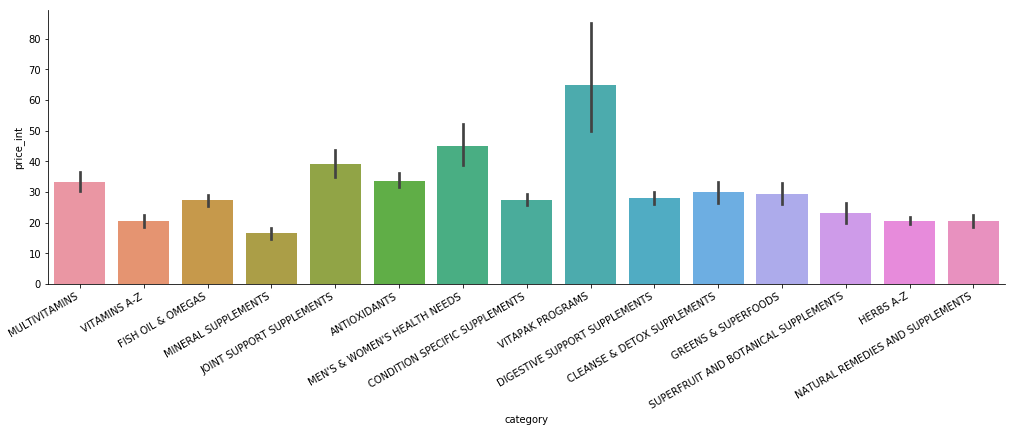

In [235]:
g =sns.catplot(x="category", y="price_int", data=gnc, kind="bar", aspect=3)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g.fig.autofmt_xdate()
plt.show()

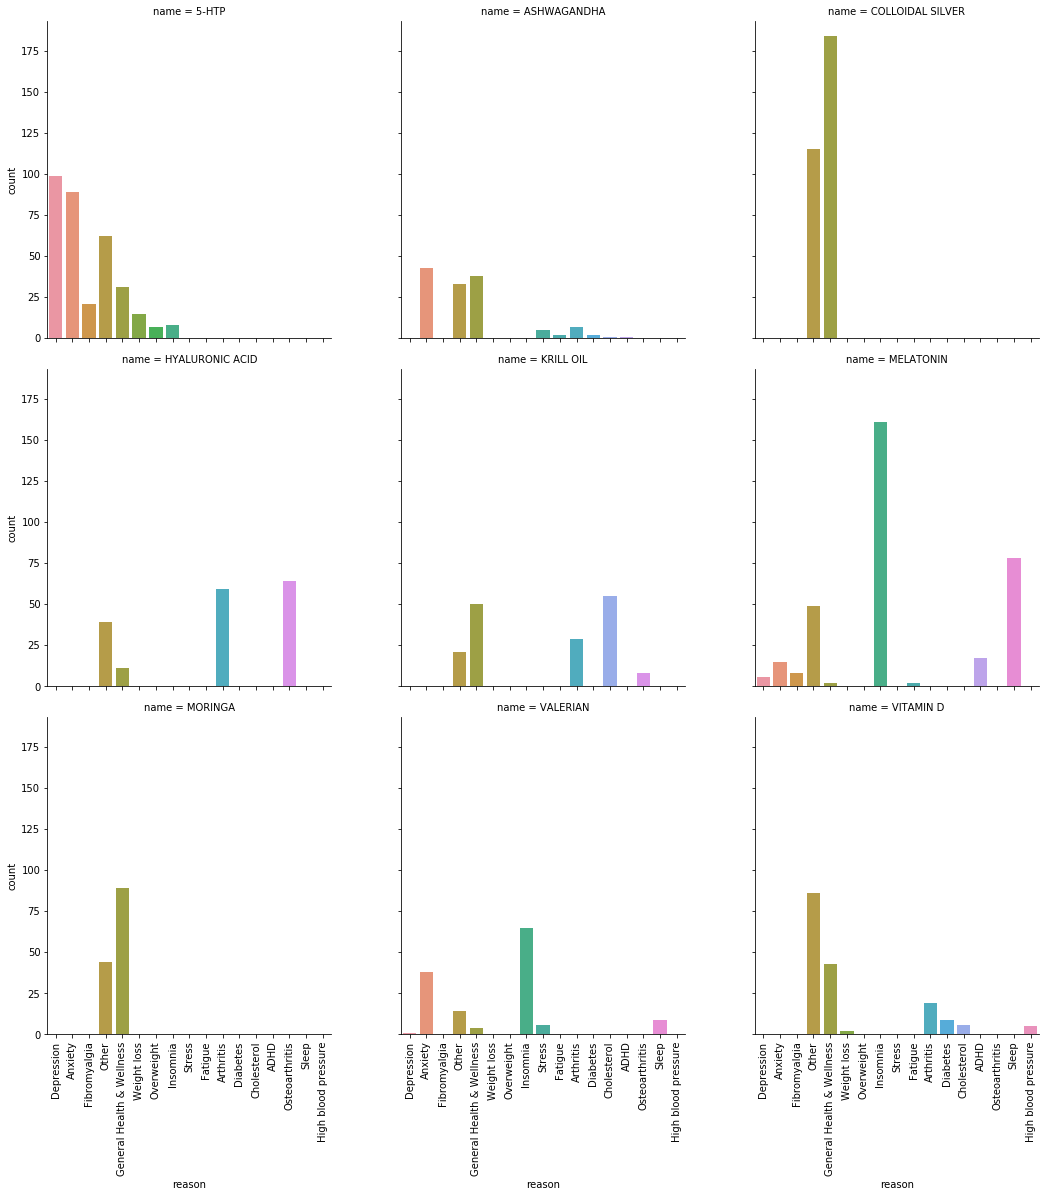

In [238]:
g = sns.catplot(x="reason", label='cause',col="name",data=df_name,kind="count",col_wrap=3)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

 - long tail observed. focused on the first top 10

In [158]:
df_re['reason'].value_counts().head(10)

Other                        1373
General Health & Wellness    1254
Anxiety                       256
Insomnia                      240
Arthritis                     184
Weight loss                   171
Depression                    169
Diabetes                      137
Cholesterol                   119
Name: reason, dtype: int64

## Data visualisation

In [14]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

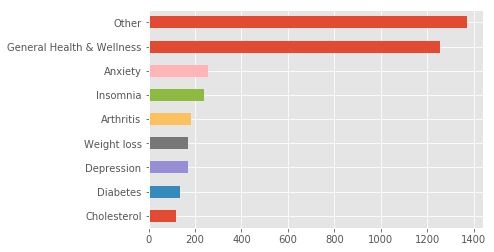

In [15]:
df_re["reason"].value_counts().sort_values(ascending=True).plot.barh()

- category other is the mostly rated by reviewers.
- check the other reasons by analysing comments using world cloud. 

Text(0,0.5,'ease_to_use')

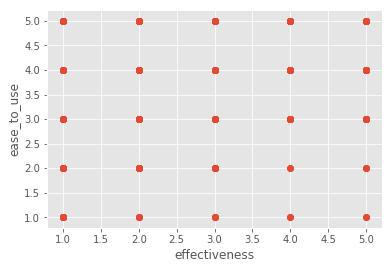

In [ ]:
group.agg(['mean', 'std'])

## GNC data Cleaning

In [68]:
gnc=pd.read_csv("gnc_test.csv" ,encoding ="cp1252")

In [71]:
gnc["product"]=gnc["product"].str.replace("\??","")
gnc

,category,product,rate,price,serving,price/serving
0,MULTIVITAMINS,GNC Kids Multi Gummy,4,$12.99,60.0,0.2
1,MULTIVITAMINS,GNC Women's Ultra Mega Gummy Multivitamin - Mi...,4,$12.99,60.0,0.2
2,MULTIVITAMINS,GNC Women's Ultra Mega 50 Plus,4,$39.99,60.0,0.7
3,MULTIVITAMINS,GNC Women's ULTRA MEGA 50 Plus One Daily,4,$19.99,60.0,0.3
4,MULTIVITAMINS,GNC Mega Men 50 Plus One Daily,4,$19.99,60.0,0.3
5,MULTIVITAMINS,GNC milestones Kids Bone Health Gummy € Assort...,5,$14.99,60.0,0.2
6,MULTIVITAMINS,GNC Mega Men Sport,4,$37.99,90.0,0.4
7,MULTIVITAMINS,GNC Mega Men 50 Plus Vitapak Program,4,$44.99,30.0,1.5
8,MULTIVITAMINS,Revolution Nutrition Vitamin Cooler,0,$39.99,25.0,1.6
9,MULTIVITAMINS,GNC Mega Men Joint Vitapak Program,4,$44.99,30.0,1.5


In [100]:
gnc.columns

Index(['category', 'product', 'rate', 'price', 'serving', 'price/serving',
       'gender', 'price_int'],
      dtype='object')

In [73]:
gnc["gender"]=""

gnc.loc[gnc["product"].str.contains("Men"),"gender"]="Men"
gnc.loc[gnc["product"].str.contains("Women|Prenatal"),"gender"]="Women"
gnc.loc[gnc["product"].str.contains("Kids|Teen"),"gender"]="Kids"
gnc.head()
gnc["price_int"]= gnc["price"].str.replace("$","").astype(float)

In [74]:
gnc.to_csv("gnc_01.csv",index=False)

In [105]:
herb = pd.read_csv("herb_natural.csv")
herb.columns =['category', 'product', 'rate', 'price', 'serving', 'price/serving']
herb["gender"]=""

herb.loc[herb["product"].str.contains("Men"),"gender"]="Men"
herb.loc[herb["product"].str.contains("Women|Prenatal"),"gender"]="Women"
herb.loc[herb["product"].str.contains("Kids|Teen"),"gender"]="Kids"
herb.head()
herb["price_int"]= herb["price"].str.replace("$","").astype(float)
herb.head()

,category,product,rate,price,serving,price/serving,gender,price_int
0,HERBS A-E,Nature's Way® Echinacea,0,$17.99,60.0,0.3,,17.99
1,HERBS A-E,GNC Herbal Plus® Cinnamon Bark 500 mg,5,$23.99,200.0,0.1,,23.99
2,HERBS A-E,GNC Herbal Plus® Cat's Claw Bark 500mg,5,$7.99,100.0,0.1,,7.99
3,HERBS A-E,GNC Herbal Plus® Astragalus 500 mg,5,$9.99,100.0,0.1,,9.99
4,HERBS A-E,GNC Herbal Plus® Cranberry Fruit 500MG,5,$17.99,100.0,0.2,,17.99


In [106]:
gnc = gnc.append(herb)

In [24]:
gnc = gnc.drop_duplicates(subset='product', keep="first")
gnc

,category,product,rate,price,serving,price/serving,gender,price_int
0,MULTIVITAMINS,GNC Kids Multi Gummy,4,$12.99,60.0,0.2,Kids,12.99
1,MULTIVITAMINS,GNC Women's Ultra Mega Gummy Multivitamin - Mi...,4,$12.99,60.0,0.2,Women,12.99
2,MULTIVITAMINS,GNC Women's Ultra Mega 50 Plus,4,$39.99,60.0,0.7,Women,39.99
3,MULTIVITAMINS,GNC Women's ULTRA MEGA 50 Plus One Daily,4,$19.99,60.0,0.3,Women,19.99
4,MULTIVITAMINS,GNC Mega Men 50 Plus One Daily,4,$19.99,60.0,0.3,Men,19.99
5,MULTIVITAMINS,GNC milestones Kids Bone Health Gummy € Assort...,5,$14.99,60.0,0.2,Kids,14.99
6,MULTIVITAMINS,GNC Mega Men Sport,4,$37.99,90.0,0.4,Men,37.99
7,MULTIVITAMINS,GNC Mega Men 50 Plus Vitapak Program,4,$44.99,30.0,1.5,Men,44.99
8,MULTIVITAMINS,Revolution Nutrition Vitamin Cooler,0,$39.99,25.0,1.6,NaN,39.99
9,MULTIVITAMINS,GNC Mega Men Joint Vitapak Program,4,$44.99,30.0,1.5,Men,44.99


In [25]:
gnc.loc[gnc["category"].str.contains("HERBS"),"category"]="HERBS A-Z"

In [26]:
gnc.to_csv("gnc_02.csv",index=False)

### GNC plots

In [172]:
gnc = pd.read_csv("gnc_02.csv")


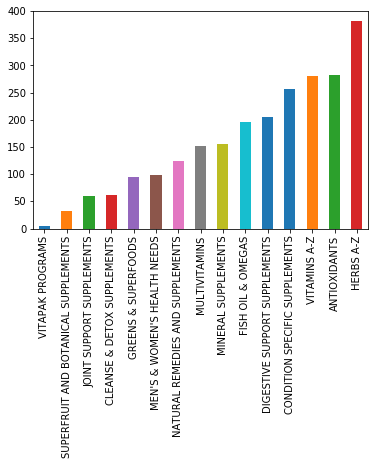

In [173]:
gnc["category"].value_counts().sort_values(ascending=True).plot.bar()

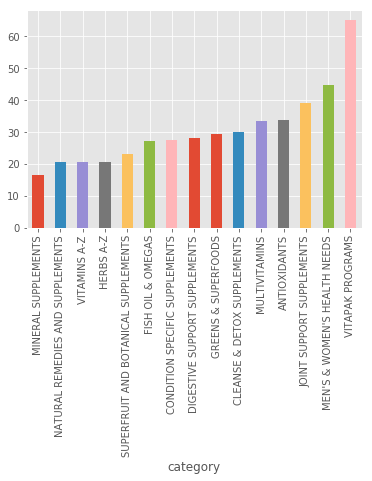

In [29]:
gnc.groupby("category")['price_int'].mean().sort_values(ascending=True).plot.bar()

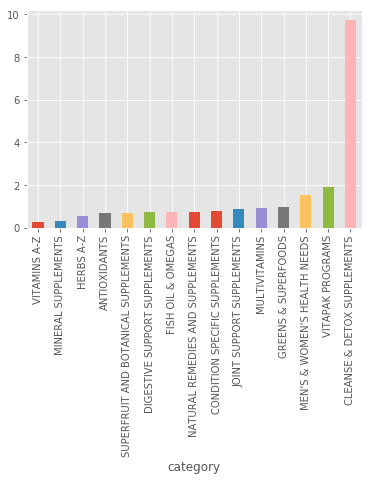

In [30]:
gnc.groupby("category")['price/serving'].mean().sort_values(ascending=True).plot.bar()

- detox supplements are occasionally used, this can't be compared with other everyday use items.

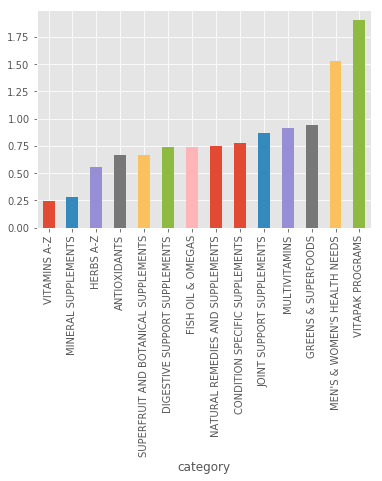

In [32]:
nodetox = gnc.loc[gnc["category"] != "CLEANSE & DETOX SUPPLEMENTS"]
nodetox.groupby("category")['price/serving'].mean().sort_values(ascending=True).plot.bar()

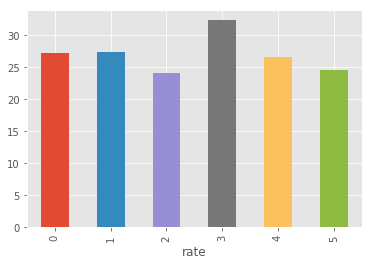

In [139]:
gnc_rate = gnc.loc[gnc['rate']>0]
gnc.groupby("rate")['price_int'].mean().plot.bar()

In [ ]:
gnc.groupby("category")['price/serving'].mean().sort_values(ascending=True).plot.bar()

In [8]:
group.agg(['mean', 'std'])

NameError: name 'group' is not defined

In [9]:
gnc["price_int"]= gnc["price"].str.replace("$","").astype(float)

gnc.head()

,category,product,rate,price,serving,price/serving,gender,price_int
0,MULTIVITAMINS,GNC Kids Multi Gummy,4,$12.99,60.0,0.2,Kids,12.99
1,MULTIVITAMINS,GNC Women's Ultra Mega Gummy Multivitamin - Mi...,4,$12.99,60.0,0.2,Women,12.99
2,MULTIVITAMINS,GNC Women's Ultra Mega 50 Plus,4,$39.99,60.0,0.7,Women,39.99
3,MULTIVITAMINS,GNC Women's ULTRA MEGA 50 Plus One Daily,4,$19.99,60.0,0.3,Women,19.99
4,MULTIVITAMINS,GNC Mega Men 50 Plus One Daily,4,$19.99,60.0,0.3,Men,19.99


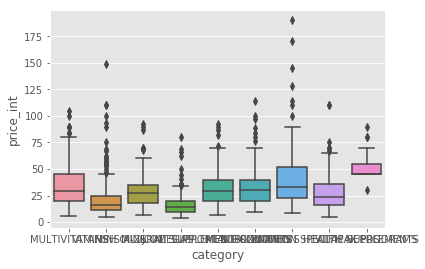

In [29]:
sns.boxplot(x='category', y='price_int', data=gnc)

Text(0,0.5,'Price')

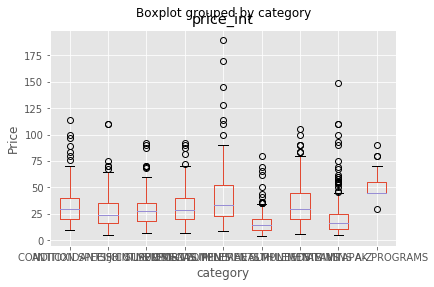

In [20]:
budget_df = df_price_range.copy()
budget_df.boxplot(by='category', column='price_int')
#lambda x: (np.abs(x-x.mean())/x.std() <3).all(axis=1)
mask=(abs(budget_df.price_int-budget_df.price_int.mean())/budget_df.price_int.std())<100
budget_df=budget_df.loc[mask,:]
plt.ylabel('Price')

In [185]:
import seaborn as sns

C:\Users\Soo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


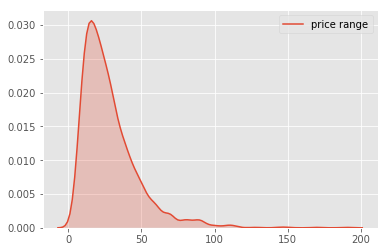

In [25]:
sns.kdeplot(gnc['price_int'], shade=True, label='price range')

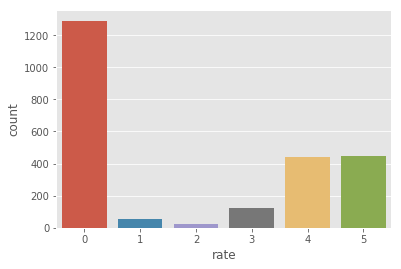

In [35]:
sns.countplot(gnc['rate'], label='rating')

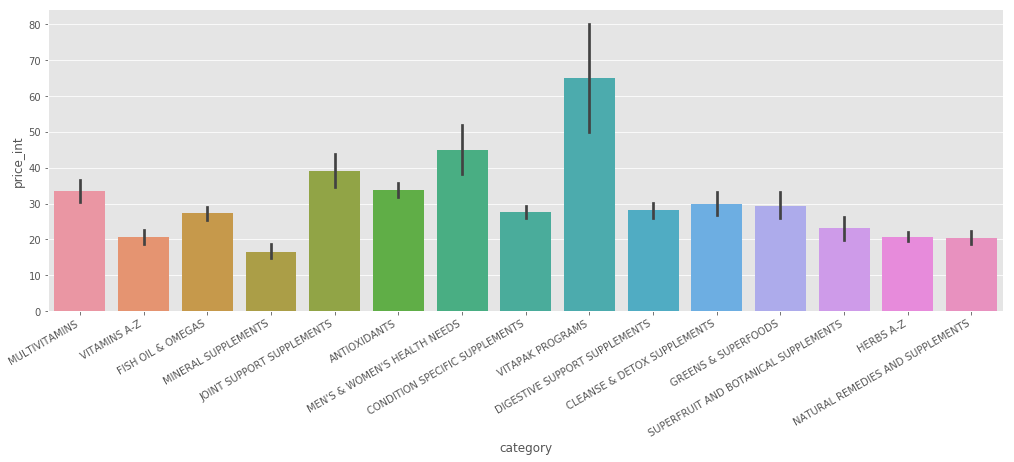

In [55]:
g =sns.catplot(x="category", y="price_int", data=gnc, kind="bar", aspect=3)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.setp(g.ax.get_xticklabels(), rotation=30,ha="right")
plt.show()

In [58]:
sns.barplot("price_int", "category", gnc, hue="gender", palette={"Men": "b", "Women": "r", "Kids" :"g"})

TypeError: barplot() got multiple values for argument 'hue'

In [ ]:
ing = ['5-HTP', 'ACTIVATED CHARCOAL', 'ASHWAGANDHA', 'ASTAXANTHIN', 'ASTRAGALUS', 'BERBERINE', 'BIOTIN', 'BROMELAIN', 'CALCIUM', 'CHLORELLA', 'CHLOROPHYLL', 'CHOLINE', 'CHROMIUM', 'COCONUT OIL', 'COD LIVER OIL', 'COLLOIDAL SILVER', 'CONJUGATED LINOLEIC ACID', 'CORDYCEPS', 'CREATINE', 'DAMIANA', 'ECHINACEA', 'EMU OIL', 'EVENING PRIMROSE OIL', 'FENUGREEK', 'FISH OIL', 'FOLIC ACID', 'GABA (GAMMA-AMINOBUTYRIC ACID)', 'GARLIC', 'GINGER', 'GINKGO', 'GLUCOMANNAN', 'GLUTATHIONE', 'GOTU KOLA', 'HOLY BASIL', 'HORNY GOAT WEED', 'HYALURONIC ACID', 'INOSITOL', 'IODINE', 'IRON', 'KRILL OIL', 'L-ARGININE', 'L-CARNITINE', 'LECITHIN', 'LEMON BALM', 'LICORICE', 'LUTEIN', 'MACA', 'MAGNESIUM', 'MARITIME PINE', 'MELATONIN', 'MORINGA', 'OOLONG TEA', 'PHENYLALANINE', 'PHOSPHATIDYLSERINE', 'POTASSIUM', 'PROGESTERONE', 'PROPOLIS', 'PU-ERH TEA', 'QUERCETIN', 'RASPBERRY KETONE', 'RHODIOLA', 'ROYAL JELLY', 'SAW PALMETTO', 'SERRAPEPTASE', 'SLIPPERY ELM', 'TAURINE', 'TEA TREE OIL', 'TRIBULUS', 'VALERIAN', 'Vitamin A', 'Vitamin D', 'Vitamin E', 'WHEY PROTEIN', 'WITCH HAZEL', 'XYLITOL', 'YOHIMBE', 'ZINC']

In [176]:
gnc[gnc['product'].str.contains("Vitamin D")==True][]

,category,product,rate,price,serving,price/serving,gender,price_int
152,VITAMINS A-Z,GNC Vitamin D-3 1000 IU - Chocolate,5,$14.99,60.0,0.2,NaN,14.99
164,VITAMINS A-Z,GNC Vitamin D-3 2000 IU,4,$14.99,180.0,0.1,NaN,14.99
173,VITAMINS A-Z,GNC Vitamin D-3 1000 IU,4,$7.99,180.0,0.0,NaN,7.99
181,VITAMINS A-Z,GNC Vitamin D-3 5000 IU,4,$19.99,180.0,0.1,NaN,19.99
182,VITAMINS A-Z,Source Naturals Vitamin D-3,0,$14.99,200.0,0.1,NaN,14.99
193,VITAMINS A-Z,"Nature's Way Vitamin D3 5,000 IU",5,$16.49,240.0,0.1,NaN,16.49
194,VITAMINS A-Z,Carlson Cal-1000 with Vitamin D,3,$29.99,83.0,0.4,NaN,29.99
196,VITAMINS A-Z,Source Naturals Vitamin D-3 2 fl.oz,4,$10.99,369.0,0.0,NaN,10.99
202,VITAMINS A-Z,Jarrow Formulas Vitamin D3 1000 IU,0,$8.99,100.0,0.1,NaN,8.99
218,VITAMINS A-Z,"Now Vitamin D-3 5,000 IU",5,$22.99,240.0,0.1,NaN,22.99


In [ ]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

## NLP preparation

In [6]:
import nltk
import pandas as pd
import numpy as np 
import re
np.nan!=None

True

In [7]:
ndf = pd.read_csv("webmd.csv")
ndf.columns=["reason","name","effectiveness","easetouse","comment"]
ndf_wc = ndf.loc[ndf['reason']=="Other"]

In [8]:
# Fill na with empty string
ndf_wc['comment'] = ndf_wc['comment'].fillna('')
ndf_wc.head()

C:\Users\Soo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,reason,name,effectiveness,easetouse,comment
7,Other,5-HTP,1,5,Took for 2 days in a combo herb supplement for...
81,Other,5-HTP,3,5,I bought this drug to enhance lucid dreaming. ...
94,Other,5-HTP,1,4,I found it contributed to severe stomach pain ...
98,Other,5-HTP,5,5,I don't have dementia but came close enough to...
121,Other,5-HTP,3,5,-Being very hurtful and increasing hostile fee...


- most common ingredients in category in other

In [67]:
ndf_wc.groupby("reason")["name"].value_counts().head()

reason  name            
Other   COLLOIDAL SILVER    104
        5-HTP                46
        VITAMIN D            46
        SERRAPEPTASE         44
        MELATONIN            43
Name: name, dtype: int64

In [9]:
ndf_wc = ndf_wc.loc[ndf_wc['effectiveness']>=3]

In [10]:
print(sum(ndf_wc['comment'] == '') / ndf.shape[0])

0.007660661086678962


In [11]:
import re

In [112]:
# Convert all the string to lower cases
ndf_wc['comment'] = ndf_wc['comment'].str.lower()
# \s+ means all empty space (\n, \r, \t)
ndf_wc['comment'] = ndf_wc['comment'].apply(lambda x: re.sub('\s+', ' ', x)) # \s all empty spaces + repeat
 # We don't want empty string in our text
ndf_wc = ndf_wc.loc[ndf['comment'] != ""]


In [113]:
ndf_wc['comment'] = ndf_wc['comment'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [159]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
newStopWords = ['full','comment','show',"taking","take","took","doctor","really","days","one","im","dr","years","used","weeks","vits","vit","units","months","month","year","week","unit","use","colloidal","silver","colloidal silver","started","mg","would","build","help","5htp","htp","put","day","works", "capsule", "work","htp","charcoal","vitamin","oil","dont","care","treatment"]
stop.extend(newStopWords)
list_name = ndf_wc["name"].str.lower().unique()
list_name=list_name.tolist()
stop.extend(list_name)

In [160]:
ndf_wc['comment'] = ndf_wc['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [16]:
from textblob import TextBlob

In [35]:
from wordcloud import WordCloud

In [41]:
len(ndf_wc["name"].unique())

77

In [161]:
def gen_wc(df,col):
    list_cmt =[]
    list_values = df[col].unique()
    for value in list_values :
        x=" ".join(df[df[col]==value]["comment"])
        wc = WordCloud( max_words=100, background_color="white").generate(x)
        list_cmt.append(x) 
    return list_cmt
        

In [88]:
len(list_cmt)

77

In [127]:
list_values = ndf_wc["name"].unique()

In [169]:
list_values.tolist().index("MELATONIN")

49

In [162]:
list_cmt = gen_wc(ndf_wc,"name")


In [119]:
list_cmt

In [38]:
keys = ndf_wc["name"].unique()
values = list_cmt
dict_comment = dict(zip(keys, values))


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

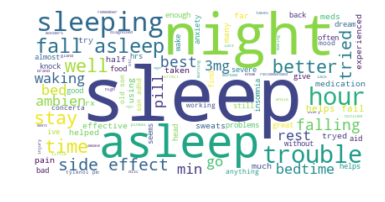

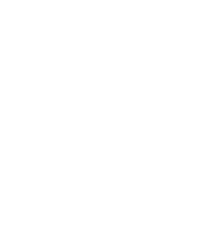

In [170]:
wc = WordCloud( max_words=100, background_color="white").generate(list_cmt[49])
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(3, 4))
plt.axis("off")
plt.show()

In [171]:
wc.to_file("first_review_melatonin.png")